# IBM Data Science Professional Certificate

## Capstone Project: To Predict the Severity of a Traffic Accident

### Monica
#### monica110394@gmail.com
#### https://www.linkedin.com/in/monica110394/
#### https://github.com/monica110394/Coursera_Capstone

Date: 9-10-2020



In [120]:
# imporing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [66]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [121]:
# loading the dataset
data = pd.read_csv('Data-Collisions.csv')

# knowing the dimensions of the dataset
print('Number of rows:', data.shape[0],'\nNumber of Columns', data.shape[1])
data.head()

Number of rows: 194673 
Number of Columns 38


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [68]:
# knowing the attributes present in the dataset
print('Column Names:\n\n', data.columns)

Column Names:

 Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


In [69]:
# keeping only the necessary columns
data = data[['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 
             'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND', 
 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR']]

print('Updated Features:\n', data.columns)
print('\nNumber of rows:', data.shape[0],'\nNumber of Columns', data.shape[1])

Updated Features:
 Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR'],
      dtype='object')

Number of rows: 194673 
Number of Columns 17


In [70]:
# checking for null values
data.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1926
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
ST_COLCODE            18
HITPARKEDCAR           0
dtype: int64

In [71]:
# removing rows with high number of null values
data.drop(columns=['SPEEDING', 'INATTENTIONIND'], inplace = True)
print('Updated Features:\n', data.columns)
print('\nNumber of rows:', data.shape[0],'\nNumber of Columns', data.shape[1])

Updated Features:
 Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'HITPARKEDCAR'],
      dtype='object')

Number of rows: 194673 
Number of Columns 15


In [72]:
# checking for null values
data.isnull().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
HITPARKEDCAR        0
dtype: int64

In [73]:
# removing rows with null values
data.dropna(axis=0, inplace = True)
# data.reset_index(inplace = True)
print('Updated Features:\n', data.columns)
print('\nNumber of rows:', data.shape[0],'\nNumber of Columns', data.shape[1])
print('\nNumber of Null Values', data.isnull().sum())

Updated Features:
 Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'HITPARKEDCAR'],
      dtype='object')

Number of rows: 182895 
Number of Columns 15

Number of Null Values SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
SDOT_COLCODE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64


In [74]:
# checking the datatypes of the features
print('Data types of all attributes:\n\n', data.dtypes)

Data types of all attributes:

 SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
SDOT_COLCODE      int64
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
HITPARKEDCAR     object
dtype: object


In [75]:
# converting string labels into numbers
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['ADDRTYPE'] = le.fit_transform(data['ADDRTYPE'])
data['COLLISIONTYPE'] = le.fit_transform(data['COLLISIONTYPE'])
data['JUNCTIONTYPE'] = le.fit_transform(data['JUNCTIONTYPE'])
data['UNDERINFL'] = le.fit_transform(data['UNDERINFL'])
data['WEATHER'] = le.fit_transform(data['WEATHER'])
data['ROADCOND'] = le.fit_transform(data['ROADCOND'])
data['LIGHTCOND'] = le.fit_transform(data['LIGHTCOND'])
data['HITPARKEDCAR'] = le.fit_transform(data['HITPARKEDCAR'])

In [76]:
# changing to categorical data types
data['SEVERITYCODE'] = data['SEVERITYCODE'].astype('category')
data['ADDRTYPE'] = data['ADDRTYPE'].astype('category')
data['COLLISIONTYPE'] = data['COLLISIONTYPE'].astype('category')
data['JUNCTIONTYPE'] = data['JUNCTIONTYPE'].astype('category')
data['SDOT_COLCODE'] = data['SDOT_COLCODE'].astype('category')
data['UNDERINFL'] = data['UNDERINFL'].astype('category')
data['WEATHER'] = data['WEATHER'].astype('category')
data['ROADCOND'] = data['ROADCOND'].astype('category')
data['LIGHTCOND'] = data['LIGHTCOND'].astype('category')
data['ST_COLCODE'] = data['ST_COLCODE'].astype('category')
data['HITPARKEDCAR'] = data['HITPARKEDCAR'].astype('category')

In [77]:
print('Dataframe Summary:\n')
print(data.info())

Dataframe Summary:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182895 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   SEVERITYCODE   182895 non-null  category
 1   ADDRTYPE       182895 non-null  category
 2   COLLISIONTYPE  182895 non-null  category
 3   PERSONCOUNT    182895 non-null  int64   
 4   PEDCOUNT       182895 non-null  int64   
 5   PEDCYLCOUNT    182895 non-null  int64   
 6   VEHCOUNT       182895 non-null  int64   
 7   JUNCTIONTYPE   182895 non-null  category
 8   SDOT_COLCODE   182895 non-null  category
 9   UNDERINFL      182895 non-null  category
 10  WEATHER        182895 non-null  category
 11  ROADCOND       182895 non-null  category
 12  LIGHTCOND      182895 non-null  category
 13  ST_COLCODE     182895 non-null  category
 14  HITPARKEDCAR   182895 non-null  category
dtypes: category(11), int64(4)
memory usage: 8.9 MB
None


In [78]:
print('Statistical Summary:')
data.describe(include ='all')

Statistical Summary:


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
count,182895.0,182895.0,182895.0,182895.000000,182895.000000,182895.000000,182895.000000,182895.0,182895.0,182895.0,182895.0,182895.0,182895.0,182895,182895.0
unique,2.0,3.0,10.0,NaN,NaN,NaN,NaN,7.0,39.0,4.0,11.0,9.0,9.0,114,2.0
top,1.0,1.0,5.0,NaN,NaN,NaN,NaN,4.0,11.0,2.0,1.0,0.0,5.0,32,0.0
freq,126270.0,119362.0,43119.0,NaN,NaN,NaN,NaN,86609.0,83024.0,94956.0,109059.0,122153.0,113837.0,24094,177205.0
mean,NaN,NaN,NaN,2.476268,0.038995,0.029831,1.971984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.370912,0.202960,0.171435,0.563237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# renaming columns
data.rename(columns={'SEVERITYCODE':'SEVERITY', 'ADDRTYPE':'ADDRESS TYPE', 'COLLISIONTYPE':'COLLISION TYPE', 
                     'PERSONCOUNT':'#PEOPLE INVOLVED', 'PEDCOUNT':'#PEDESTRIANS INVOLVED', 
                     'PEDCYLCOUNT':'#BICYCLES INVOLVED', 'VEHCOUNT':'#VEHICLES INVOLVED', 
                     'JUNCTIONTYPE':'JUNCTION TYPE', 'SDOT_COLCODE':'COLLISION DESC', 'UNDERINFL':'ALCOHOLIC/DRUG DRIVER', 
                     'ROADCOND':'ROAD CONDITION', 'LIGHTCOND':'LIGHT CONDITION', 
                     'ST_COLCODE':'STATE COLLISION DESC', 'HITPARKEDCAR':'PARKED CAR HIT'}, inplace = True)
data.head()

,SEVERITY,ADDRESS TYPE,COLLISION TYPE,#PEOPLE INVOLVED,#PEDESTRIANS INVOLVED,#BICYCLES INVOLVED,#VEHICLES INVOLVED,JUNCTION TYPE,COLLISION DESC,ALCOHOLIC/DRUG DRIVER,WEATHER,ROAD CONDITION,LIGHT CONDITION,STATE COLLISION DESC,PARKED CAR HIT
0,2,2,0,2,0,0,2,1,11,2,4,8,5,10,0
1,1,1,9,2,0,0,2,4,16,0,6,8,2,11,0
2,1,1,5,4,0,0,3,4,14,0,4,0,5,32,0
3,1,1,4,3,0,0,3,4,11,2,1,0,5,23,0
4,2,2,0,2,0,0,2,1,11,0,6,8,5,10,0


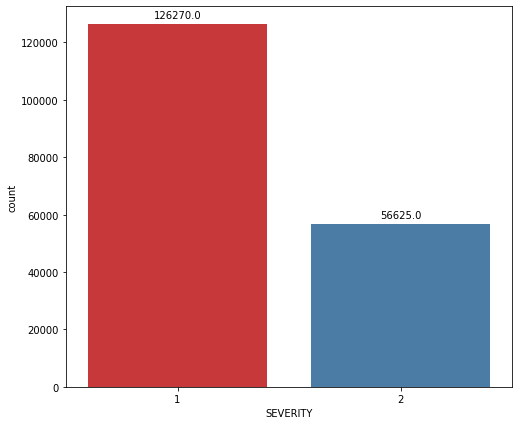

In [80]:
plt.figure(figsize=(8,7))
g = sns.countplot(data = data, x = 'SEVERITY', palette="Set1", saturation=0.7)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


Number of rows: 113250 
Number of Columns 15


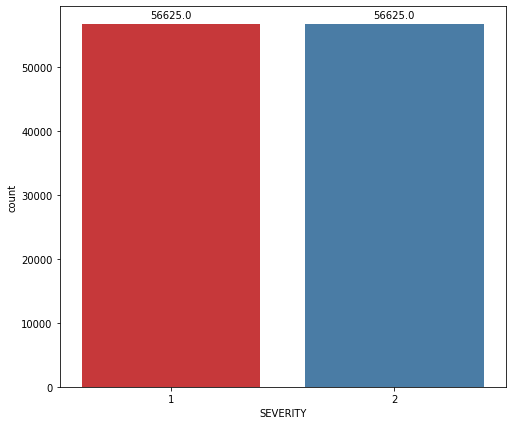

In [81]:
# balancing the dataset
sev1 = data[data['SEVERITY']==1].sample(n = 56625, random_state=1)
sev2 = data[data['SEVERITY']==2].sample(n = 56625, random_state=1)
data = pd.concat([sev1, sev2])

print('\nNumber of rows:', data.shape[0],'\nNumber of Columns', data.shape[1])

plt.figure(figsize=(8,7))
g = sns.countplot(data = data, x = 'SEVERITY', palette="Set1", saturation=0.7)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

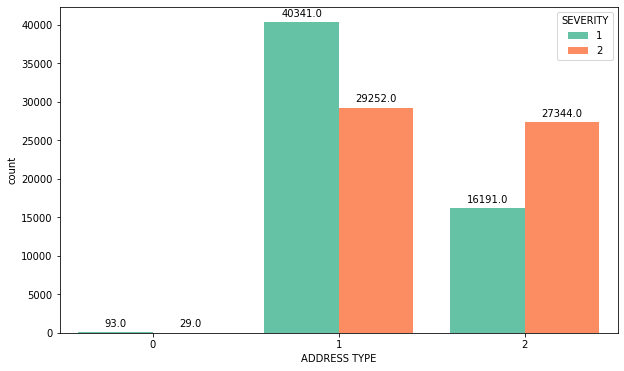

In [82]:
plt.figure(figsize=(10,6))
g = sns.countplot(data = data, x = 'ADDRESS TYPE', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

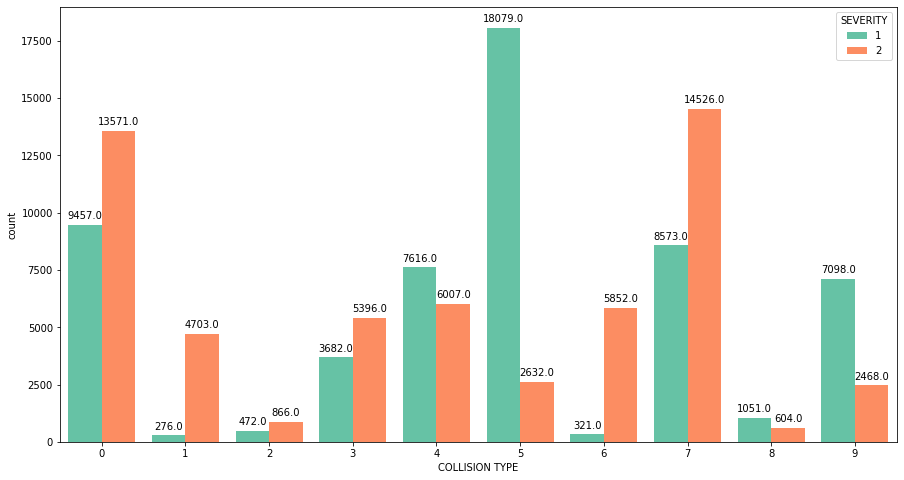

In [83]:
plt.figure(figsize=(15,8))
g = sns.countplot(data = data, x = 'COLLISION TYPE', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

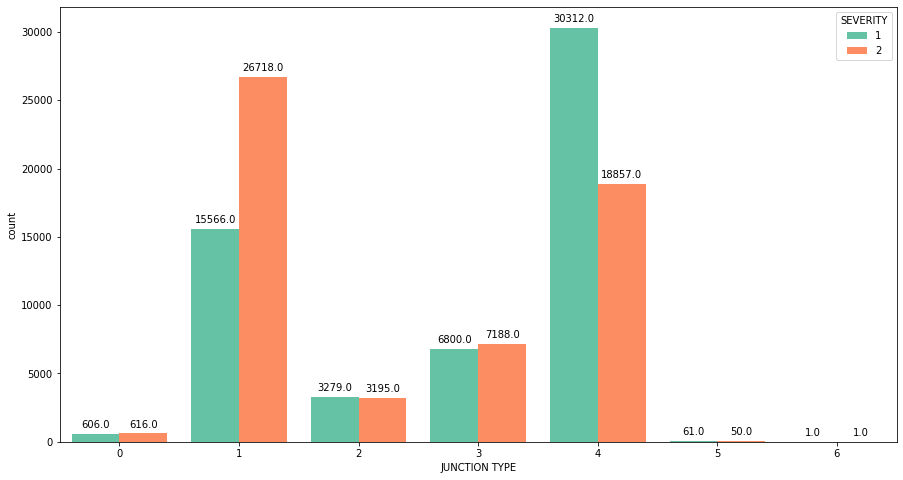

In [84]:
plt.figure(figsize=(15,8))
g = sns.countplot(data = data, x = 'JUNCTION TYPE', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

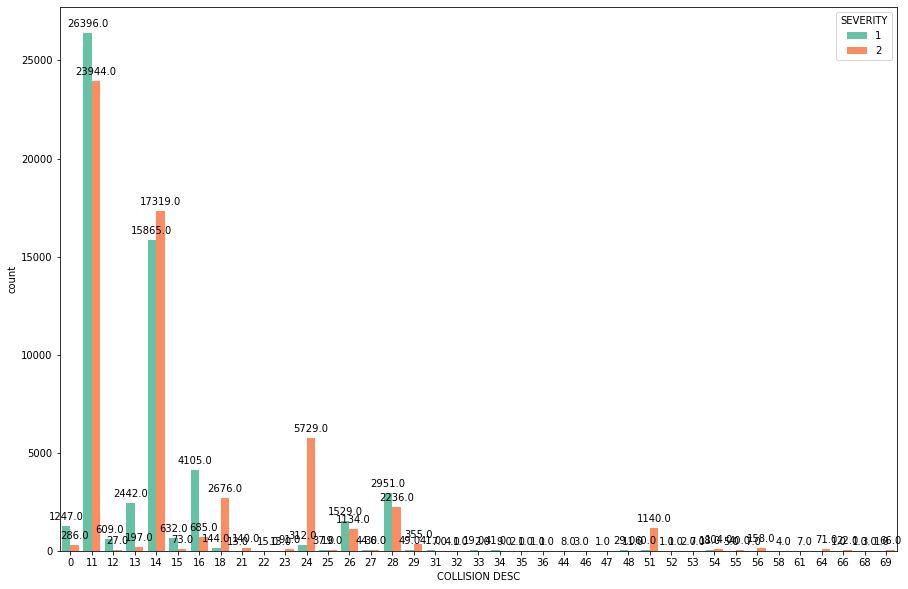

In [85]:
plt.figure(figsize=(15,10))
g = sns.countplot(data = data, x = 'COLLISION DESC', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

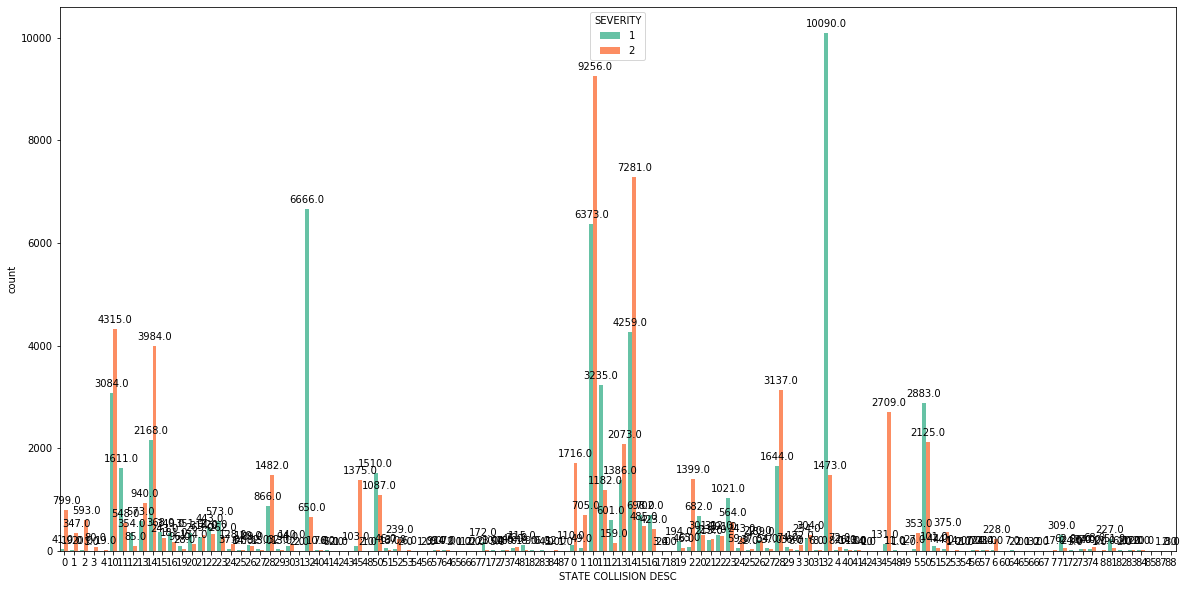

In [86]:
plt.figure(figsize=(20,10))
g = sns.countplot(data = data, x = 'STATE COLLISION DESC', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

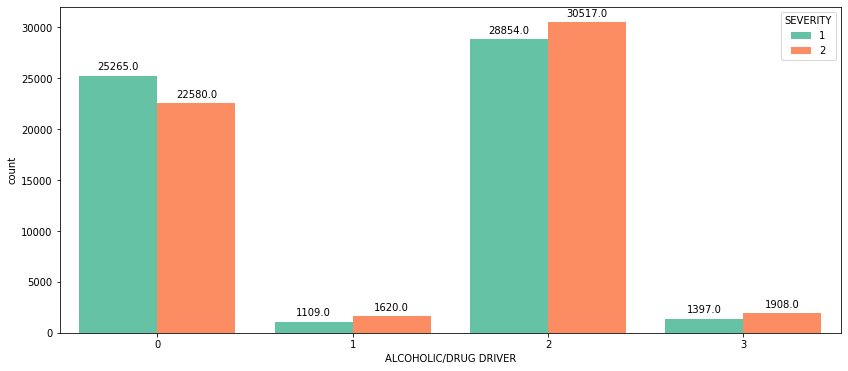

In [87]:
plt.figure(figsize=(14,6))
g = sns.countplot(data = data, x = 'ALCOHOLIC/DRUG DRIVER', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

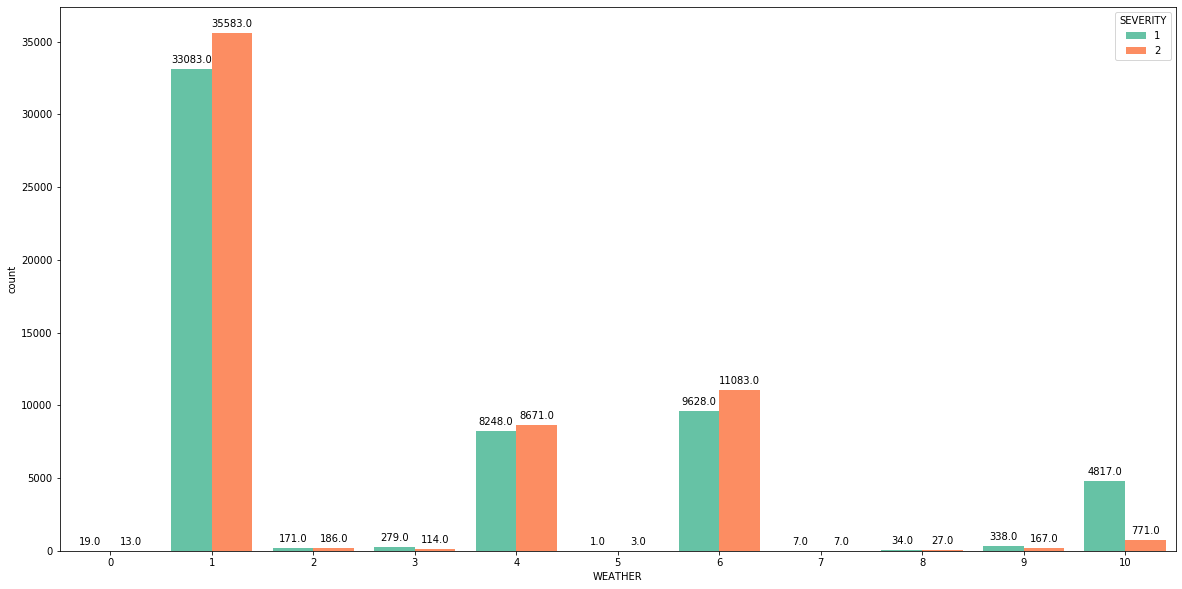

In [88]:
plt.figure(figsize=(20,10))
g = sns.countplot(data = data, x = 'WEATHER', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

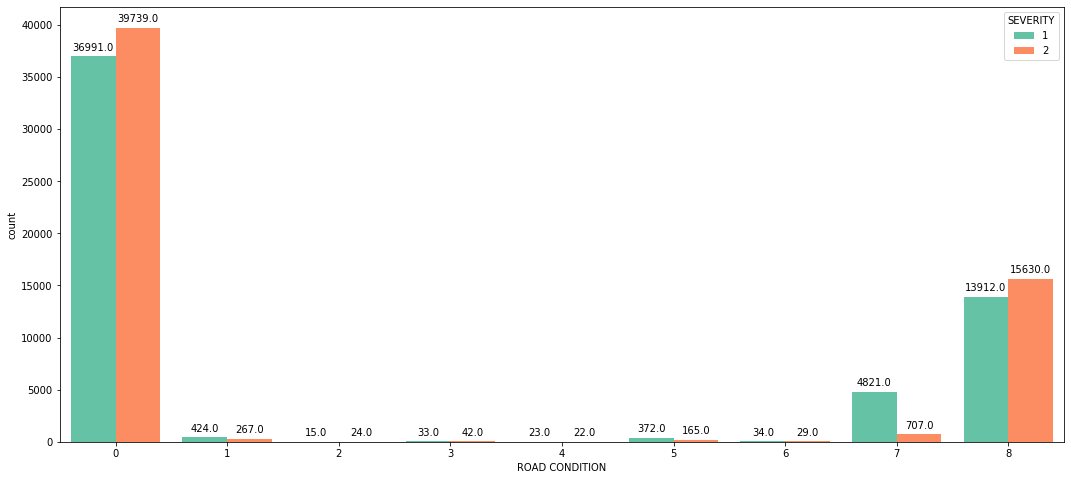

In [89]:
plt.figure(figsize=(18,8))
g = sns.countplot(data = data, x = 'ROAD CONDITION', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

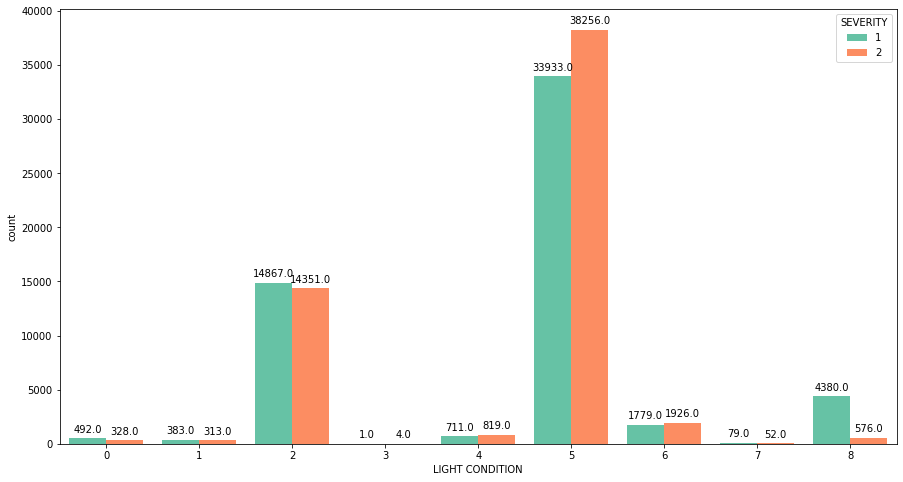

In [90]:
plt.figure(figsize=(15,8))
g = sns.countplot(data = data, x = 'LIGHT CONDITION', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

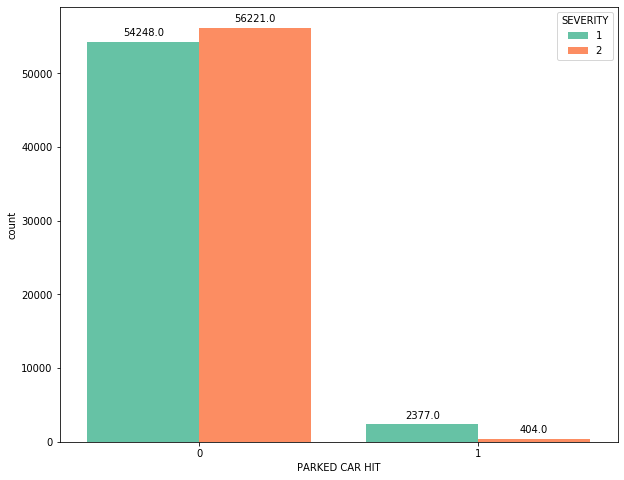

In [91]:
plt.figure(figsize=(10,8))
g = sns.countplot(data = data, x = 'PARKED CAR HIT', hue='SEVERITY', palette="Set2", saturation=1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [92]:
involved = data.groupby(['SEVERITY'], as_index=False).sum()
involved

,SEVERITY,#PEOPLE INVOLVED,#PEDESTRIANS INVOLVED,#BICYCLES INVOLVED,#VEHICLES INVOLVED
0,1,133436,342,277,113461
1,2,154656,6424,4792,107798


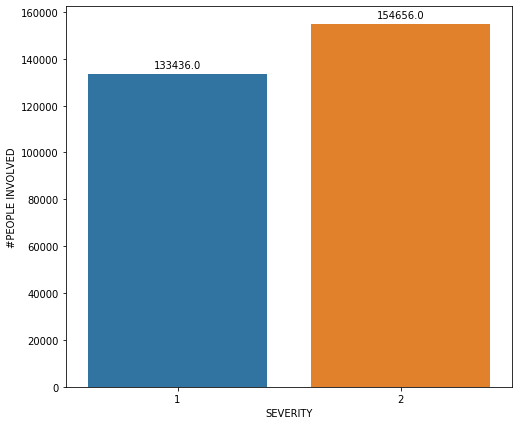

In [93]:
plt.figure(figsize=(8,7))
g = sns.barplot(y="#PEOPLE INVOLVED", x="SEVERITY", data=involved)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

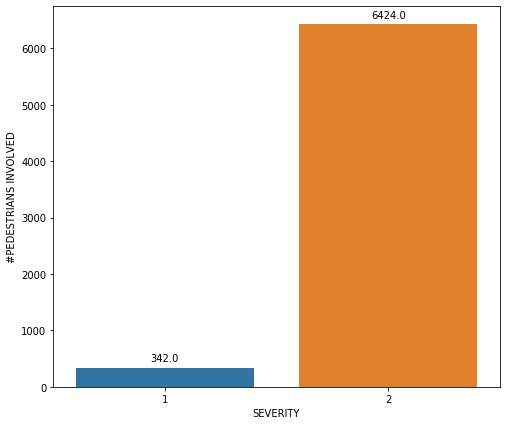

In [94]:
plt.figure(figsize=(8,7))
g = sns.barplot(y="#PEDESTRIANS INVOLVED", x="SEVERITY", data=involved)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

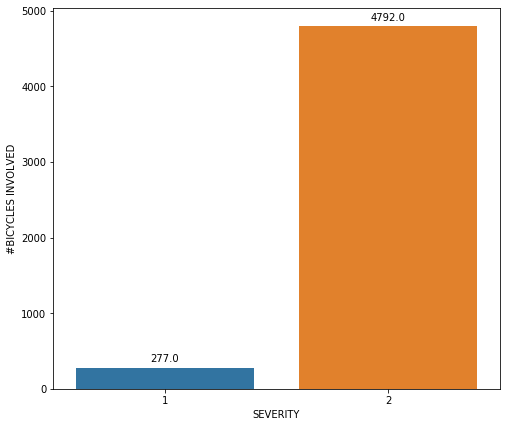

In [95]:
plt.figure(figsize=(8,7))
g = sns.barplot(y="#BICYCLES INVOLVED", x="SEVERITY", data=involved)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

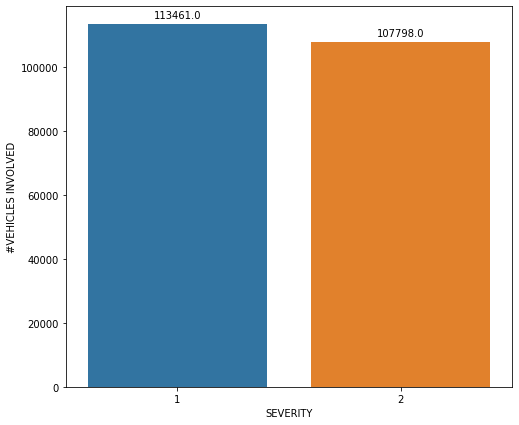

In [96]:
plt.figure(figsize=(8,7))
g = sns.barplot(y="#VEHICLES INVOLVED", x="SEVERITY", data=involved)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [97]:
data.head()

,SEVERITY,ADDRESS TYPE,COLLISION TYPE,#PEOPLE INVOLVED,#PEDESTRIANS INVOLVED,#BICYCLES INVOLVED,#VEHICLES INVOLVED,JUNCTION TYPE,COLLISION DESC,ALCOHOLIC/DRUG DRIVER,WEATHER,ROAD CONDITION,LIGHT CONDITION,STATE COLLISION DESC,PARKED CAR HIT
20819,1,1,5,2,0,0,2,4,11,0,1,0,5,20,0
114030,1,1,9,2,0,0,2,4,11,2,1,0,5,11,0
137550,1,2,3,3,0,0,3,1,11,2,1,0,5,28,0
32128,1,1,5,2,0,0,2,4,14,0,1,0,5,32,0
52426,1,1,4,3,0,0,3,2,31,0,1,0,2,22,0


In [98]:
y = data['SEVERITY'].values
y[0:5]

[1, 1, 1, 1, 1]
Categories (2, int64): [1, 2]

In [99]:
features = data.drop(columns=['SEVERITY'])
features.head()

,ADDRESS TYPE,COLLISION TYPE,#PEOPLE INVOLVED,#PEDESTRIANS INVOLVED,#BICYCLES INVOLVED,#VEHICLES INVOLVED,JUNCTION TYPE,COLLISION DESC,ALCOHOLIC/DRUG DRIVER,WEATHER,ROAD CONDITION,LIGHT CONDITION,STATE COLLISION DESC,PARKED CAR HIT
20819,1,5,2,0,0,2,4,11,0,1,0,5,20,0
114030,1,9,2,0,0,2,4,11,2,1,0,5,11,0
137550,2,3,3,0,0,3,1,11,2,1,0,5,28,0
32128,1,5,2,0,0,2,4,14,0,1,0,5,32,0
52426,1,4,3,0,0,3,2,31,0,1,0,2,22,0


In [100]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(features).transform(features)
X[0:5]

array([[-0.78486856,  0.23138773, -0.38496185, -0.24003531, -0.21465406,
         0.07597394,  1.00887947, -0.53788912, -1.13881327, -0.71206607,
        -0.67965636,  0.42454914, -0.11001508, -0.15866469],
       [-0.78486856,  1.62434501, -0.38496185, -0.24003531, -0.21465406,
         0.07597394,  1.00887947, -0.53788912,  0.82441877, -0.71206607,
        -0.67965636,  0.42454914, -0.7206508 , -0.15866469],
       [ 1.26259106, -0.46509091,  0.32287244, -0.24003531, -0.21465406,
         1.71765476, -1.15285513, -0.53788912,  0.82441877, -0.71206607,
        -0.67965636,  0.42454914,  0.43277223, -0.15866469],
       [-0.78486856,  0.23138773, -0.38496185, -0.24003531, -0.21465406,
         0.07597394,  1.00887947, -0.11439511, -1.13881327, -0.71206607,
        -0.67965636,  0.42454914,  0.70416588, -0.15866469],
       [-0.78486856, -0.11685159,  0.32287244, -0.24003531, -0.21465406,
         1.71765476, -0.43227693,  2.28540429, -1.13881327, -0.71206607,
        -0.67965636, -1.44

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90600, 14) (90600,)
Test set: (22650, 14) (22650,)


## KNN:

[0.6389, 0.6318, 0.6669, 0.6618, 0.6774, 0.671, 0.6806, 0.6779, 0.6804]


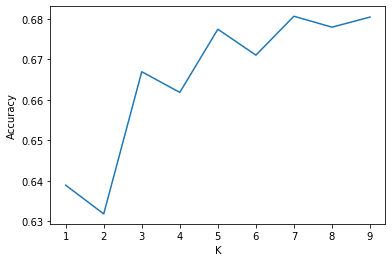


The best accuracy is 0.6806 with k= 7


In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K = 10
accuracy = []

for n in range(1,K): 
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat=knn.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, y_hat),4)
    accuracy.append(acc)

print(accuracy)

plt.plot(range(1, K), accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

print("\nThe best accuracy is", round(np.max(accuracy), 4), "with k=", np.argmax(accuracy)+1)

In [110]:
# training knn classifier with k=7
k = 7  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(knn)

# predicting train accuracy
y_hat = knn.predict(X_train)
print("\nTrain set Accuracy: ", round(metrics.accuracy_score(y_train, y_hat),4))

# predicting test accuracy
y_hat = knn.predict(X_test)
print("\nTest set Accuracy: ", round(metrics.accuracy_score(y_test, y_hat),4))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Train set Accuracy:  0.7195

Test set Accuracy:  0.6806


## Decision Tree:

[0.5532, 0.6389, 0.6389, 0.6785, 0.6952, 0.7069, 0.7085, 0.7097, 0.713, 0.7131, 0.7121, 0.7122, 0.7097, 0.7084]


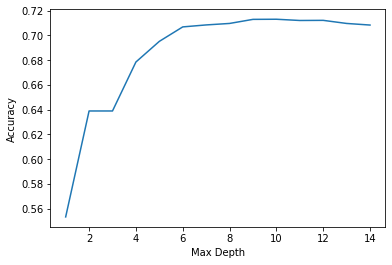


The best accuracy is 0.7131 with max depth= 10


In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

K = 15
accuracy = []

for n in range(1,K): 
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    y_hat = tree.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, y_hat),4)
    accuracy.append(acc)

print(accuracy)

plt.plot(range(1, K), accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

print("\nThe best accuracy is", round(np.max(accuracy), 4), "with max depth=", np.argmax(accuracy)+1) 

In [124]:
# training decision tree classifier with max depth=10
k = 10
tree = DecisionTreeClassifier(criterion="entropy", max_depth = k).fit(X_train,y_train)
print(tree)

# predicting train accuracy
y_hat = tree.predict(X_train)
print("\nTrain set Accuracy: ", round(metrics.accuracy_score(y_train, y_hat),4))

# predicting test accuracy
y_hat = tree.predict(X_test)
print("\nTest set Accuracy: ", round(metrics.accuracy_score(y_test, y_hat),4))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Train set Accuracy:  0.7183

Test set Accuracy:  0.7128


## Logistic Regression:

[0.6581, 0.6591, 0.6592, 0.6594, 0.6595, 0.6595, 0.6595, 0.6595, 0.6595]


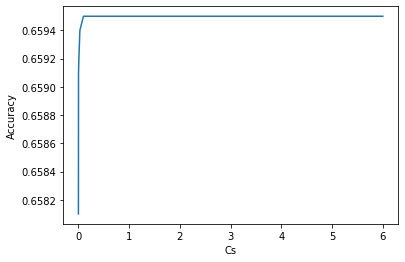


The best accuracy is 0.6595 with C= 0.1


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Cs = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 6]
accuracy = []

for c in Cs:
    LR = LogisticRegression(C=c, solver = 'liblinear').fit(X_train, y_train)
    y_hat = LR.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, y_hat),4)
    accuracy.append(acc)

print(accuracy)

plt.plot(Cs, accuracy)
plt.xlabel('Cs')
plt.ylabel('Accuracy')
plt.show()

print("\nThe best accuracy is", round(np.max(accuracy), 4), "with C=", Cs[np.argmax(accuracy)]) 

In [115]:
# training logistic regression classifier with C=0.1
C=0.1
LR = LogisticRegression(C=0.1, solver = 'liblinear').fit(X_train, y_train)
print(LR)

# predicting train accuracy
y_hat = LR.predict(X_train)
print("\nTrain set Accuracy: ", round(metrics.accuracy_score(y_train, y_hat),4))

# predicting test accuracy
y_hat = LR.predict(X_test)
print("\nTest set Accuracy: ", round(metrics.accuracy_score(y_test, y_hat),4))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train set Accuracy:  0.6591

Test set Accuracy:  0.6595


## Model Evaluation

In [131]:
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, \
        classification_report, f1_score, precision_score, recall_score, plot_roc_curve


KNN

-> Jaccard Similarity Score: 0.6806
-> F1 Score: 0.6797
-> Precision Score: 0.6991
-> Recall Score: 0.6284 

              precision    recall  f1-score   support

           1       0.70      0.63      0.66     11267
           2       0.67      0.73      0.70     11383

    accuracy                           0.68     22650
   macro avg       0.68      0.68      0.68     22650
weighted avg       0.68      0.68      0.68     22650



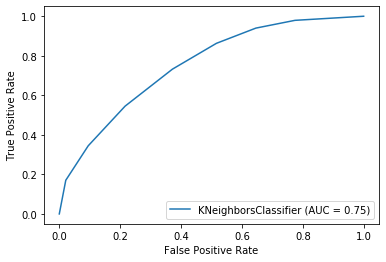

In [142]:
# KNN
y_hat = knn.predict(X_test)
print('\nKNN\n')
print('-> Jaccard Similarity Score:', round(jaccard_similarity_score(y_test, y_hat),4))
print('-> F1 Score:', round(f1_score(y_test, y_hat, average='weighted'),4))
print('-> Precision Score:', round(precision_score(y_test, y_hat),4))
print('-> Recall Score:', round(recall_score(y_test, y_hat),4), '\n')
print(classification_report(y_test, y_hat))
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show() 

Decision Tree

-> Jaccard Similarity Score: 0.7128
-> F1 Score: 0.7104
-> Precision Score: 0.7582
-> Recall Score: 0.6207 

              precision    recall  f1-score   support

           1       0.76      0.62      0.68     11267
           2       0.68      0.80      0.74     11383

    accuracy                           0.71     22650
   macro avg       0.72      0.71      0.71     22650
weighted avg       0.72      0.71      0.71     22650



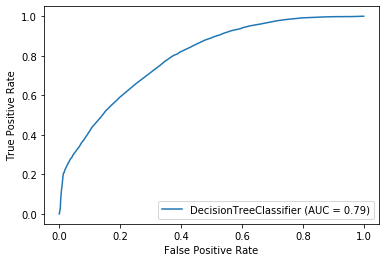

In [145]:
# Decision Tree
y_hat = tree.predict(X_test)
print('Decision Tree\n')
print('-> Jaccard Similarity Score:', round(jaccard_similarity_score(y_test, y_hat),4))
print('-> F1 Score:', round(f1_score(y_test, y_hat, average='weighted'),4))
print('-> Precision Score:', round(precision_score(y_test, y_hat),4))
print('-> Recall Score:', round(recall_score(y_test, y_hat),4), '\n')
print(classification_report(y_test, y_hat))
metrics.plot_roc_curve(tree, X_test, y_test)
plt.show()

Logistic Regression

-> Jaccard Similarity Score: 0.6595
-> F1 Score: 0.6585
-> Precision Score: 0.6417
-> Recall Score: 0.7144
-> Log Loss:  0.5899 

              precision    recall  f1-score   support

           1       0.64      0.71      0.68     11267
           2       0.68      0.61      0.64     11383

    accuracy                           0.66     22650
   macro avg       0.66      0.66      0.66     22650
weighted avg       0.66      0.66      0.66     22650



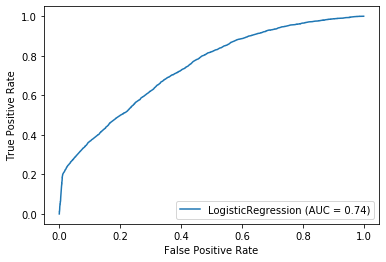

In [146]:
# Logistic Regression
y_hat = LR.predict(X_test)
y_hat_prob = LR.predict_proba(X_test)
print('Logistic Regression\n')
print('-> Jaccard Similarity Score:', round(jaccard_similarity_score(y_test, y_hat),4))
print('-> F1 Score:', round(f1_score(y_test, y_hat, average='weighted'),4))
print('-> Precision Score:', round(precision_score(y_test, y_hat),4))
print('-> Recall Score:', round(recall_score(y_test, y_hat),4))
print('-> Log Loss: ', round(log_loss(y_test, y_hat_prob),4), '\n')
print(classification_report(y_test, y_hat))
metrics.plot_roc_curve(LR, X_test, y_test)
plt.show()

## Report

| Algorithm          | Jaccard      | F1-score      | Precision   | Recall     | LogLoss    |
| ------------------ | ------------ | ------------- | ----------- | ---------- | ---------- |
| KNN                | 0.6806       | 0.6797        | 0.6991      | 0.6284     | NA         |
| Decision Tree      | 0.7128       | 0.7104        | 0.7582      | 0.6207     | NA         |
| LogisticRegression | 0.6595       | 0.6585        | 0.6417      | 0.7144     | 0.5899     |
